In [69]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import scipy.stats as stats

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [302]:
train = pd.read_csv("d:kaggle/housing/train.csv")
y_train = train.SalePrice.values

In [168]:
test = pd.read_csv("d:kaggle/housing/test.csv")

In [60]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.shape

(1460, 81)

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
missing = train.isnull().sum()/len(train)*100
missing[missing > 0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

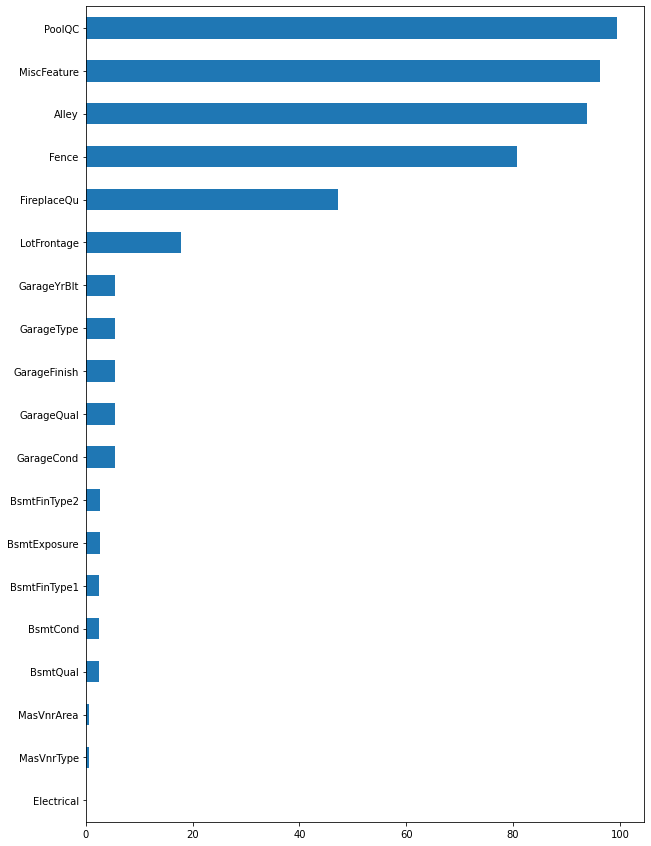

In [9]:
missing[missing > 0].sort_values().plot(kind='barh', figsize=(10,15))

## Plotting missing values


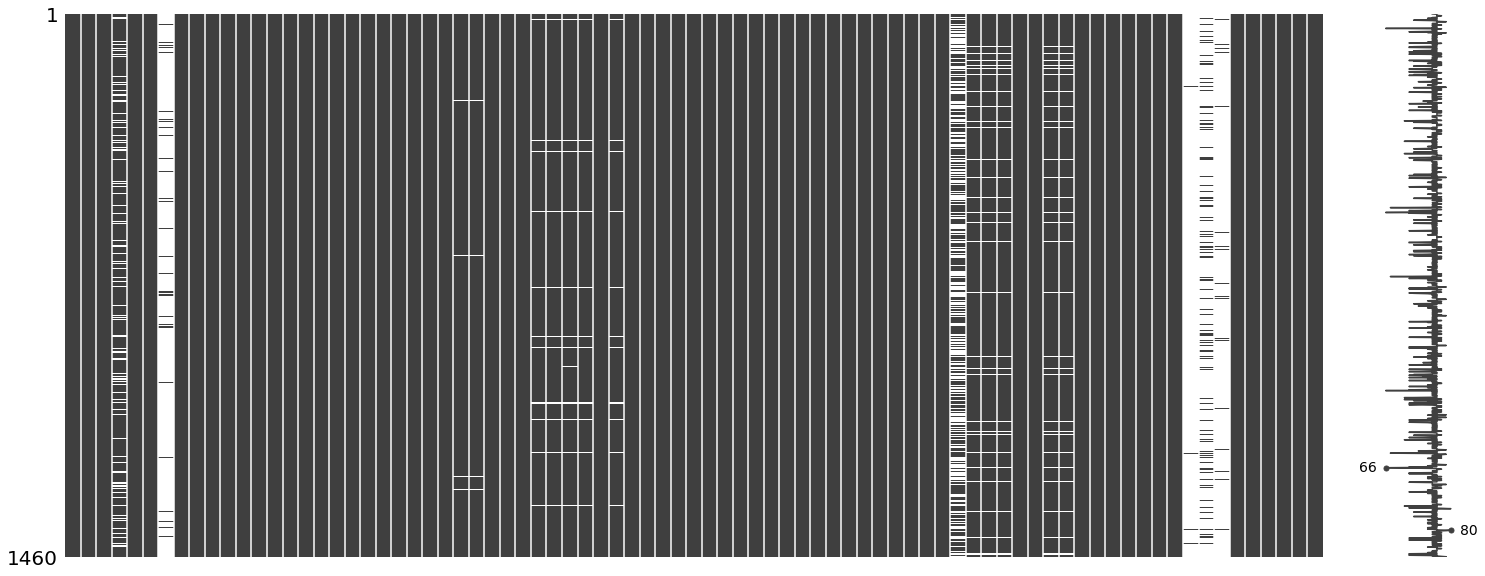

In [10]:
import missingno as msno
msno.matrix(train)

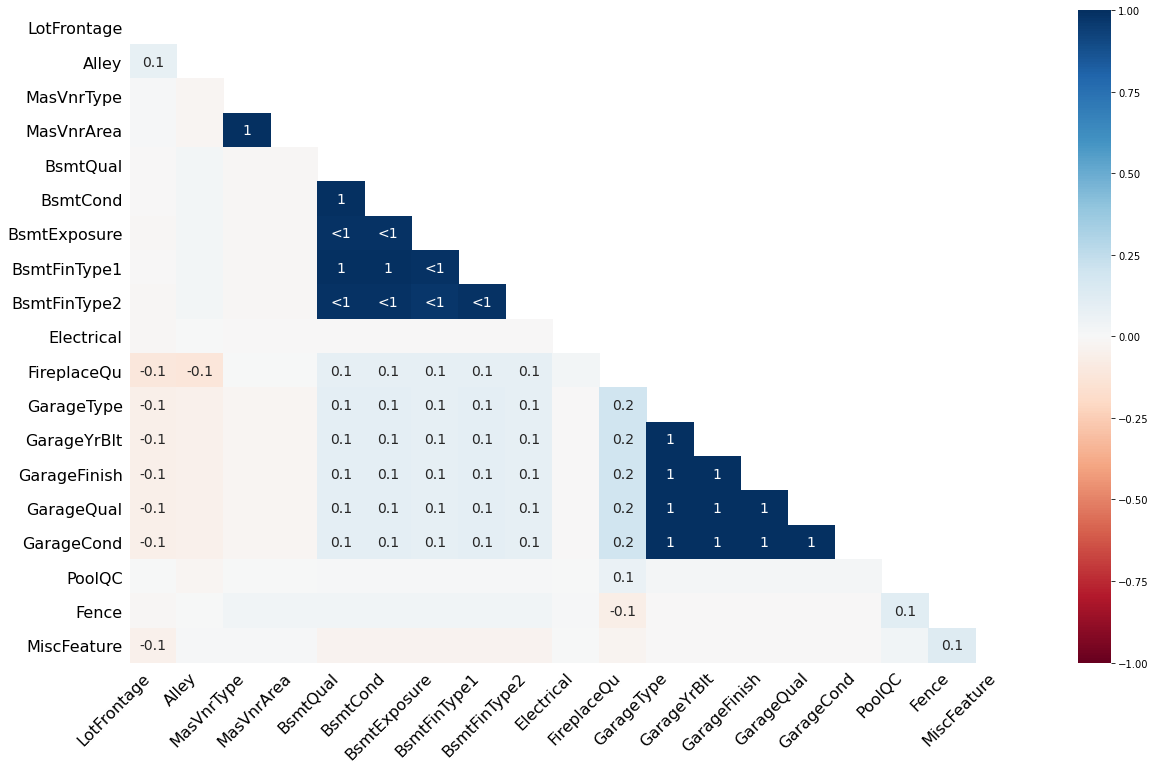

In [11]:
msno.heatmap(train)

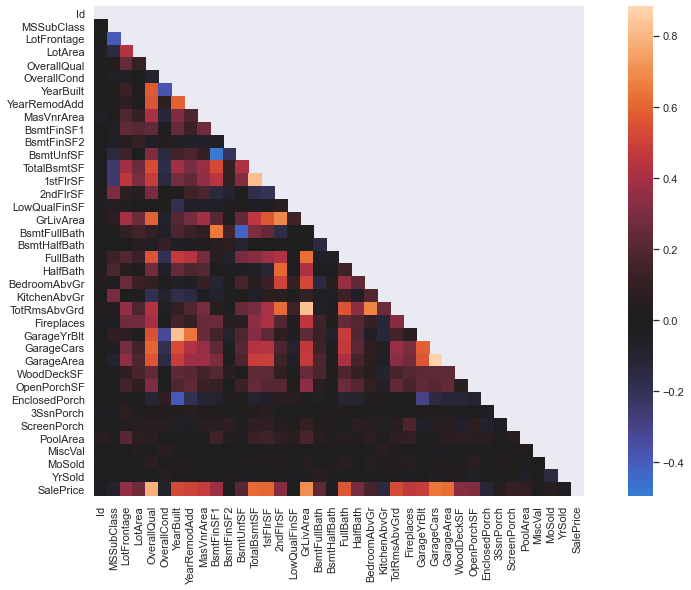

In [12]:
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,   center=0,
            square=True)

In [13]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Text(0.5, 1.0, 'DGamma')

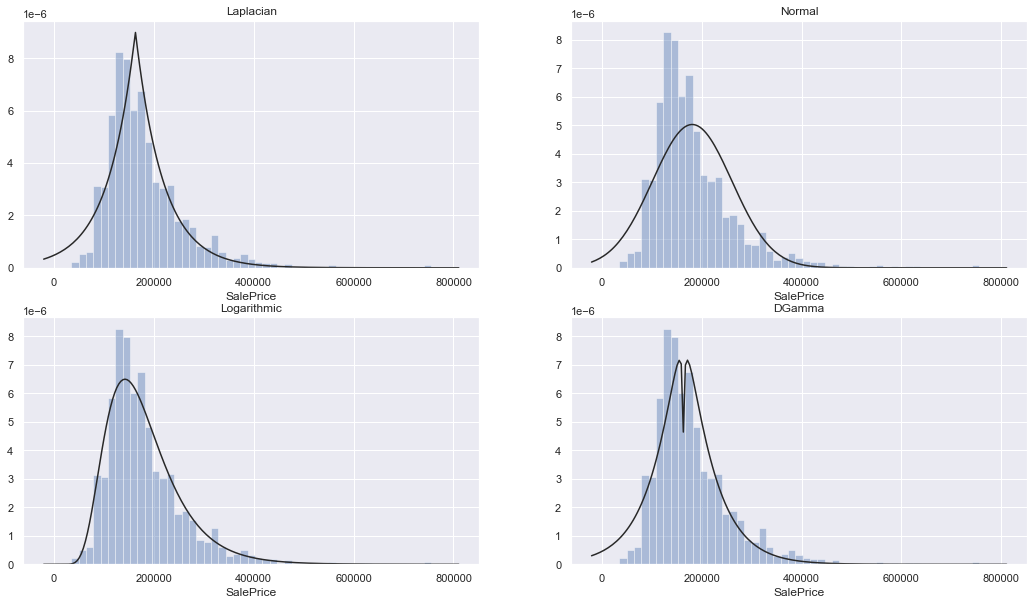

In [14]:
import scipy.stats as st
sns.set(rc={'figure.figsize':(18,10)})
fig, ax =plt.subplots(2,2)
y = train['SalePrice']

sns.distplot(y, kde=False, fit=st.laplace,ax= ax[0,0])
ax[0,0].set_title('Laplacian')
sns.distplot(y, kde=False, fit=st.norm, ax= ax[0,1])
ax[0,1].set_title('Normal')
sns.distplot(y, kde=False, fit=st.lognorm,ax= ax[1,0])
ax[1,0].set_title('Logarithmic')
sns.distplot(y, kde=False, fit=st.dgamma,ax= ax[1,1] )
ax[1,1].set_title('DGamma')

In [15]:
quantitative = [i for i in train.columns if train.dtypes[i] != 'object']
#quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [i for i in train.columns if train.dtypes[i] == 'object']

In [16]:
trainq = train[quantitative]
trainq

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


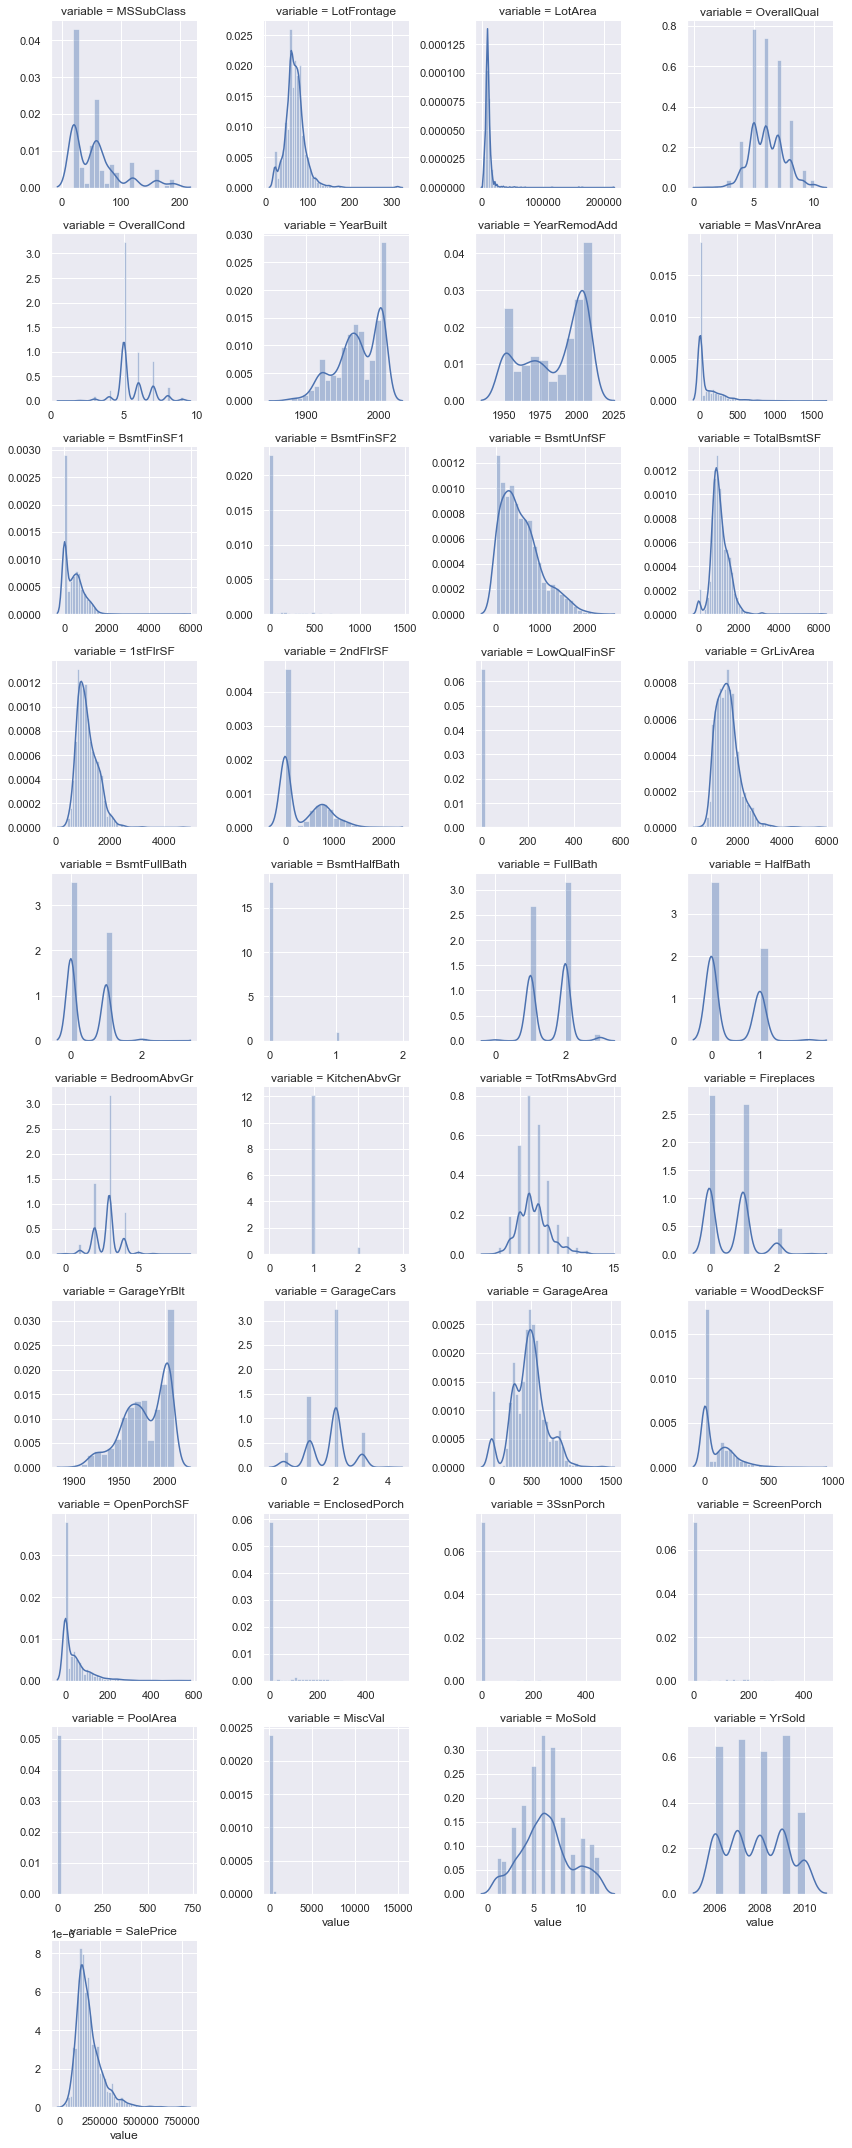

In [17]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [18]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.loc[train['LotArea']<80000]
quant = train[quantitative]

## Plot sale prices vs other variables

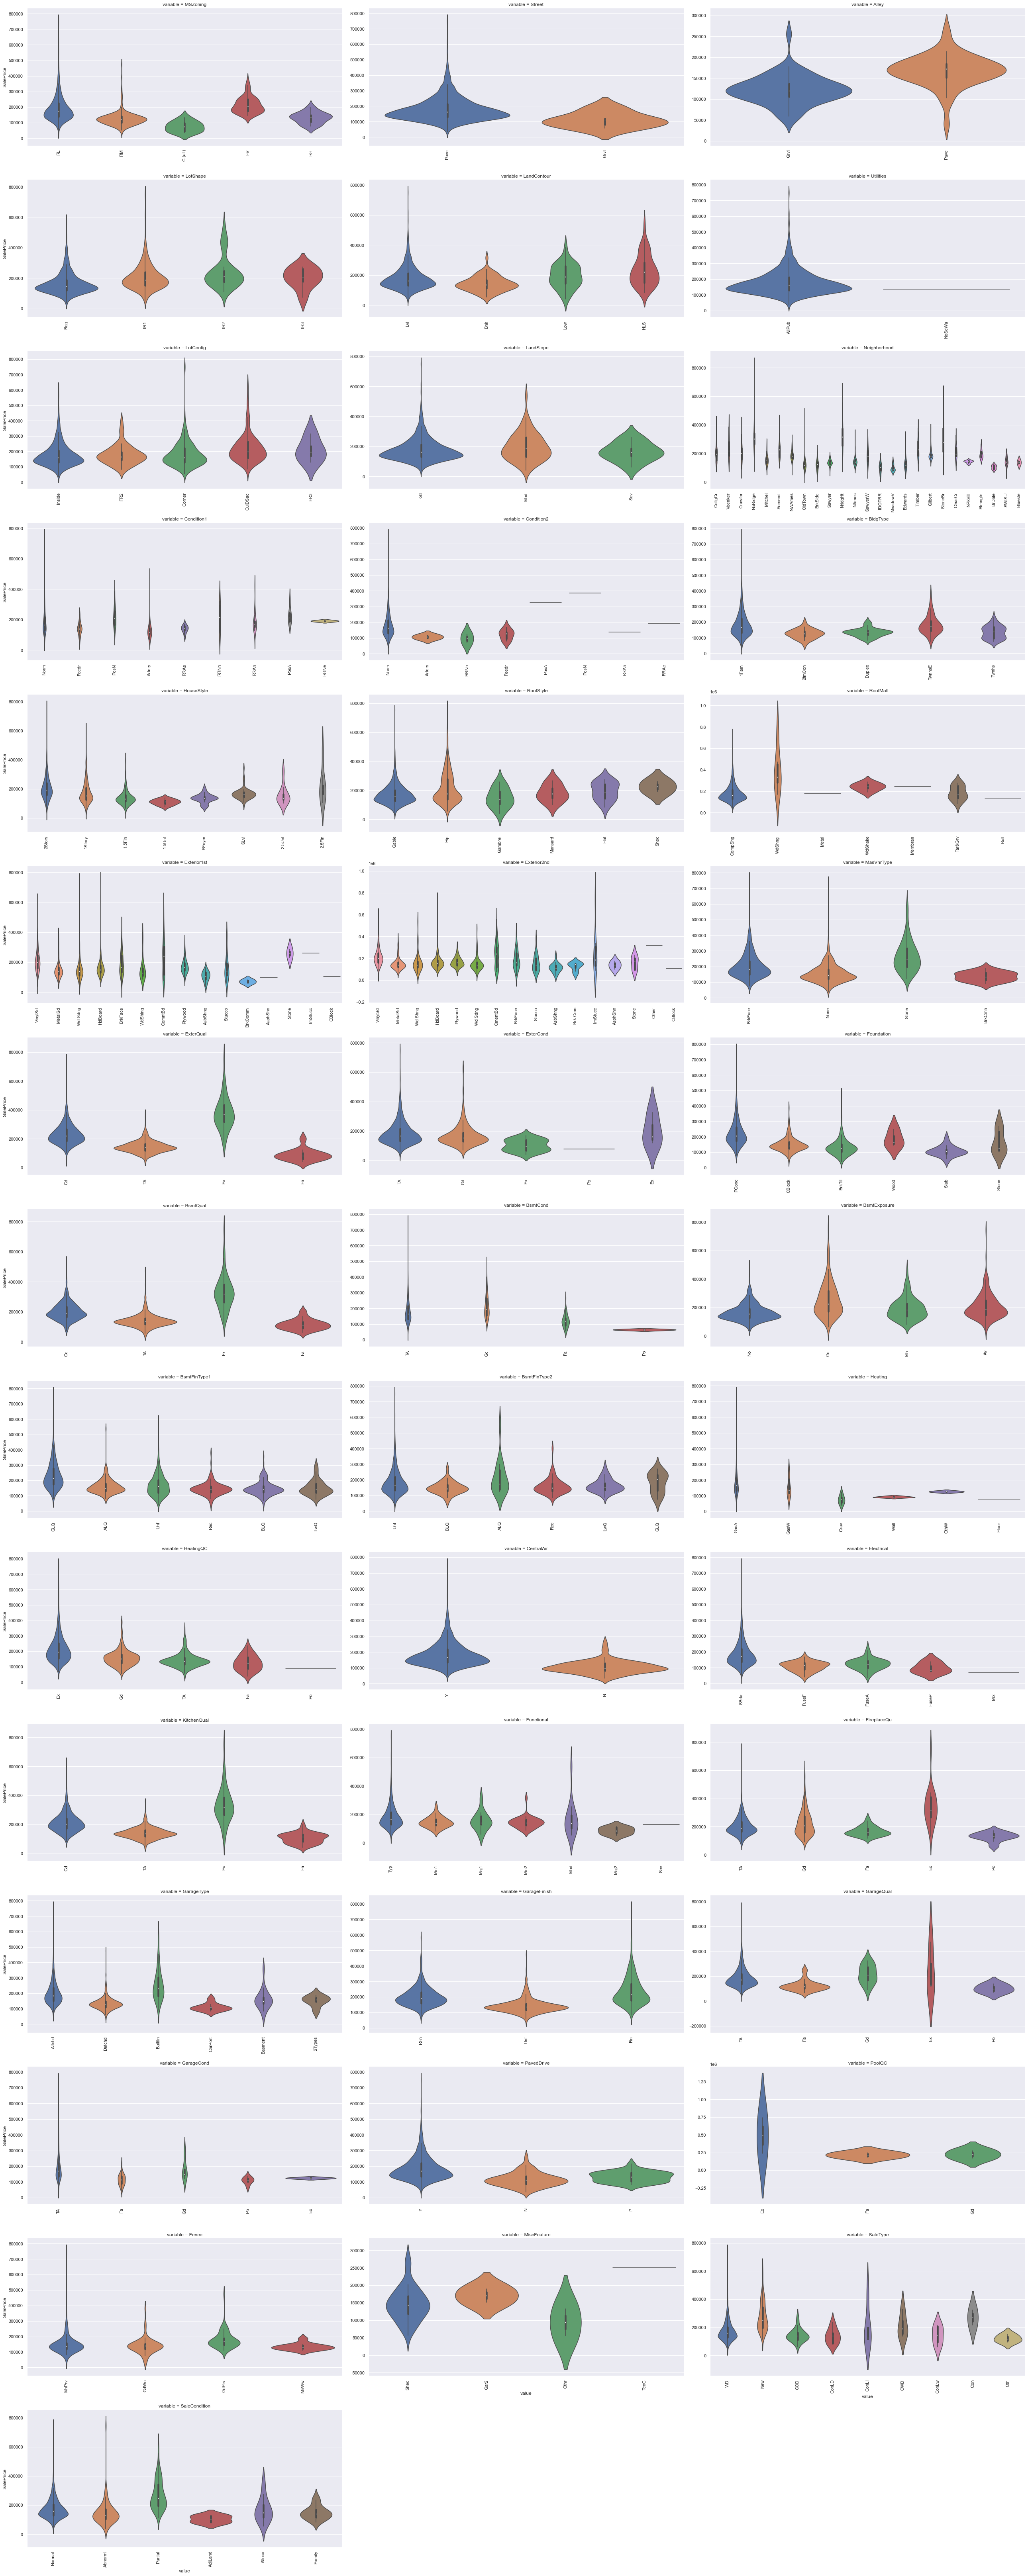

In [37]:

def violinplot(x, y, **kwargs):
    sns.violinplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train,id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False,  height=6, aspect=2)
g = g.map(violinplot, "value", "SalePrice")

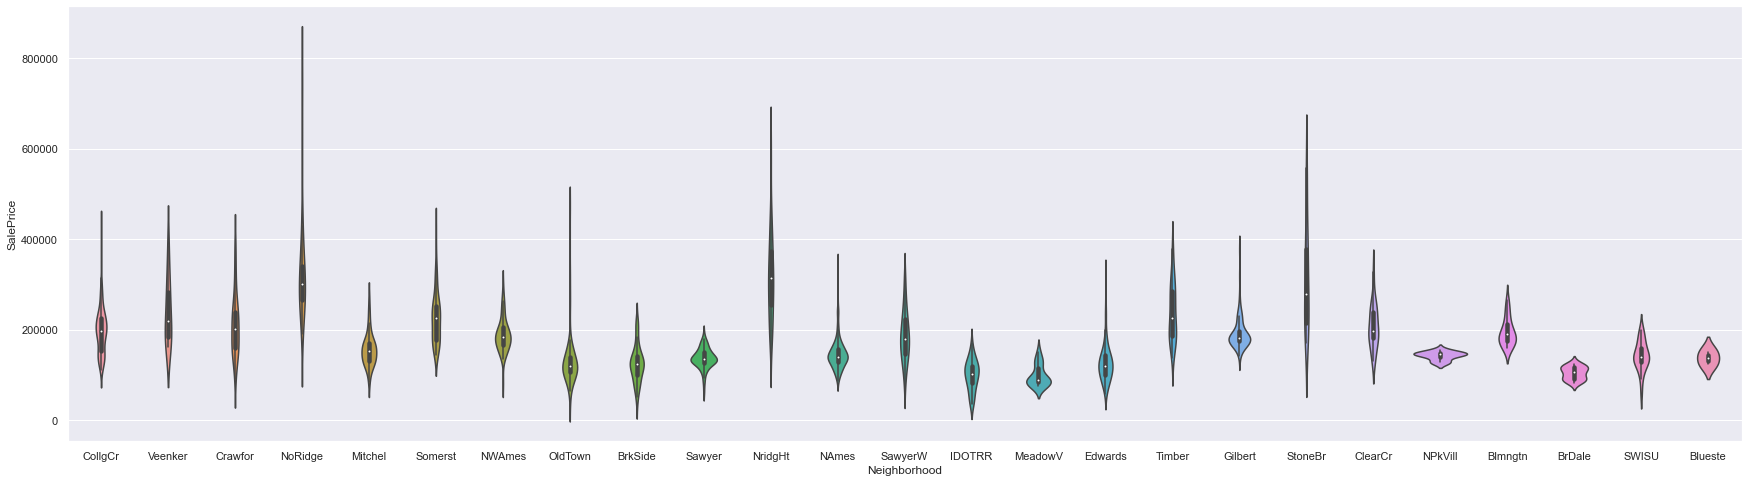

In [49]:
sns.set(rc={'figure.figsize':(30,8)})
sns.violinplot(x=train["Neighborhood"], y=train["SalePrice"], figisize=(1,2))


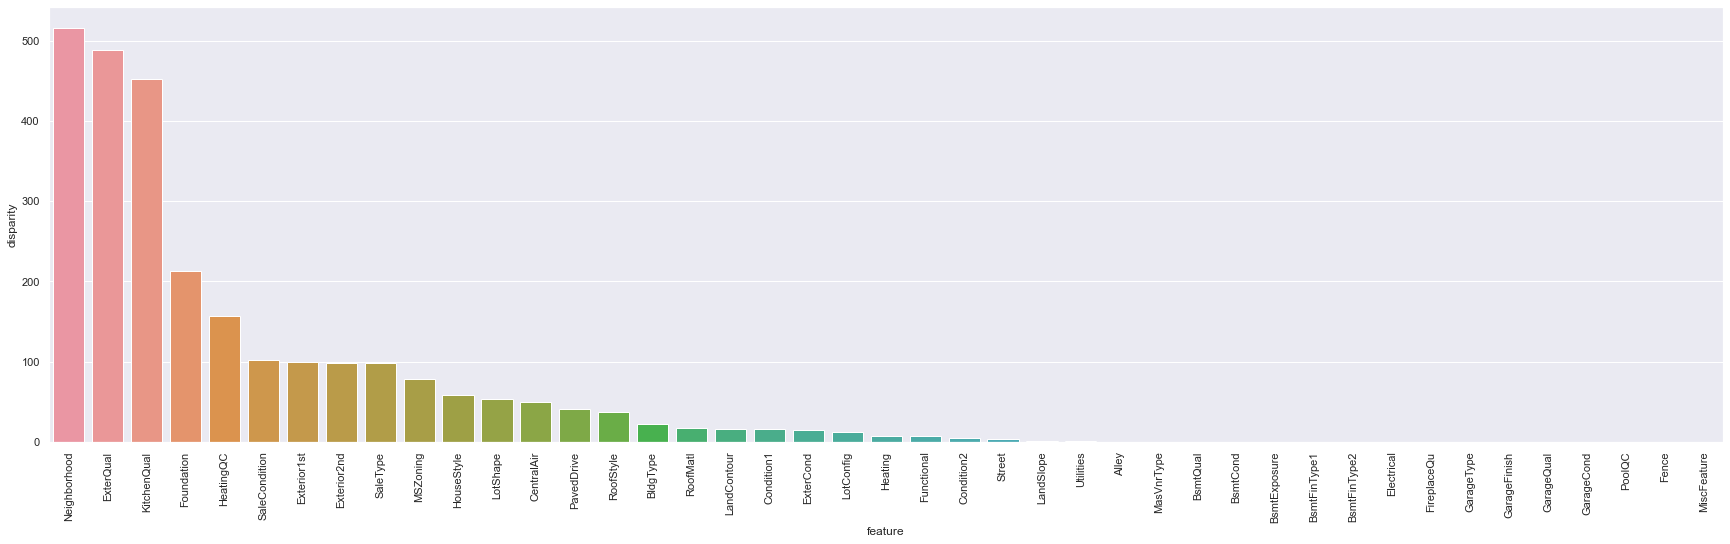

In [54]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')
sns.set(rc={'figure.figsize':(30,8)})
a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
train_std = scaler.fit_transform(quant)

# Apply PCA
pca = PCA()
pca.fit(quant)
print(pca.explained_variance_ratio_)

[9.96827080e-01 3.03666344e-03 4.92790317e-05 4.36851883e-05
 1.76125515e-05 6.34040035e-06 4.35927696e-06 4.00722704e-06
 3.67198387e-06 2.92996891e-06 1.88759225e-06 5.91938204e-07
 4.42270513e-07 4.25407580e-07 3.20593090e-07 2.01277242e-07
 1.87898350e-07 1.26708145e-07 9.83374376e-08 4.41920828e-08
 2.79666841e-08 1.55091773e-08 1.02920014e-09 2.46076896e-10
 1.15394717e-10 9.73286416e-11 7.49474912e-11 3.90575433e-11
 3.21900931e-11 2.51732515e-11 1.94978239e-11 1.45051981e-11
 1.03793366e-11 6.31095023e-12 3.76838161e-12 9.56118840e-33
 9.56118840e-33]


In [64]:
print(pca.explained_variance_ratio_.cumsum())

[0.99682708 0.99986374 0.99991302 0.99995671 0.99997432 0.99998066
 0.99998502 0.99998903 0.9999927  0.99999563 0.99999752 0.99999811
 0.99999855 0.99999898 0.9999993  0.9999995  0.99999969 0.99999981
 0.99999991 0.99999995 0.99999998 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [21]:
quant.dropna(inplace=True)


C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\contour.py:1132: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Users\Alex\anaconda3\lib\site-packages\matplotlib\contour.py:1134: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]


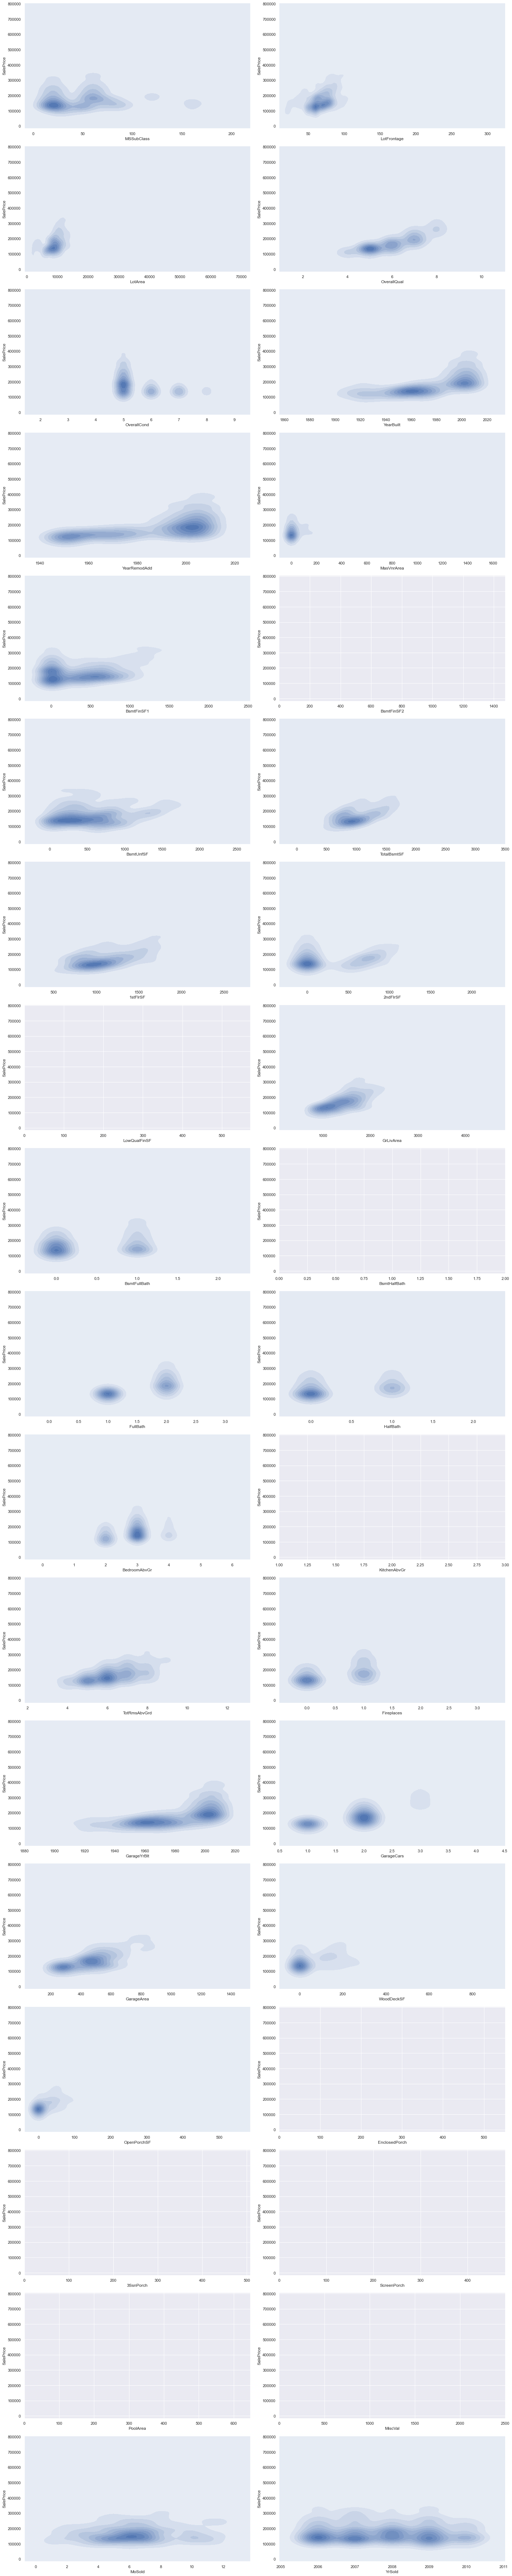

In [23]:
fig, ax = plt.subplots(18,2,figsize=(20,100))
ax = ax.flatten()
for i,col in enumerate(quant.columns[:-1]):
    sns.kdeplot(quant[col], quant['SalePrice'], shade=True,ax=ax[i])
fig.tight_layout()  

In [133]:
m = TSNE(2, random_state=0, perplexity=10)
tsne_features = m.fit_transform(quant)
print(tsne_features)

[[ -9.038377   45.081486 ]
 [  6.0983152  18.34661  ]
 [-10.778672   65.604225 ]
 ...
 [-57.74041    21.297113 ]
 [-12.631121  -20.893826 ]
 [ -1.6145062 -20.47488  ]]


In [134]:

tsne = pd.DataFrame(tsne_features)
tsne.reset_index(level=0, inplace=True)
#train.reset_index(level=0, inplace=True)
all = train.merge(tsne, on='index')


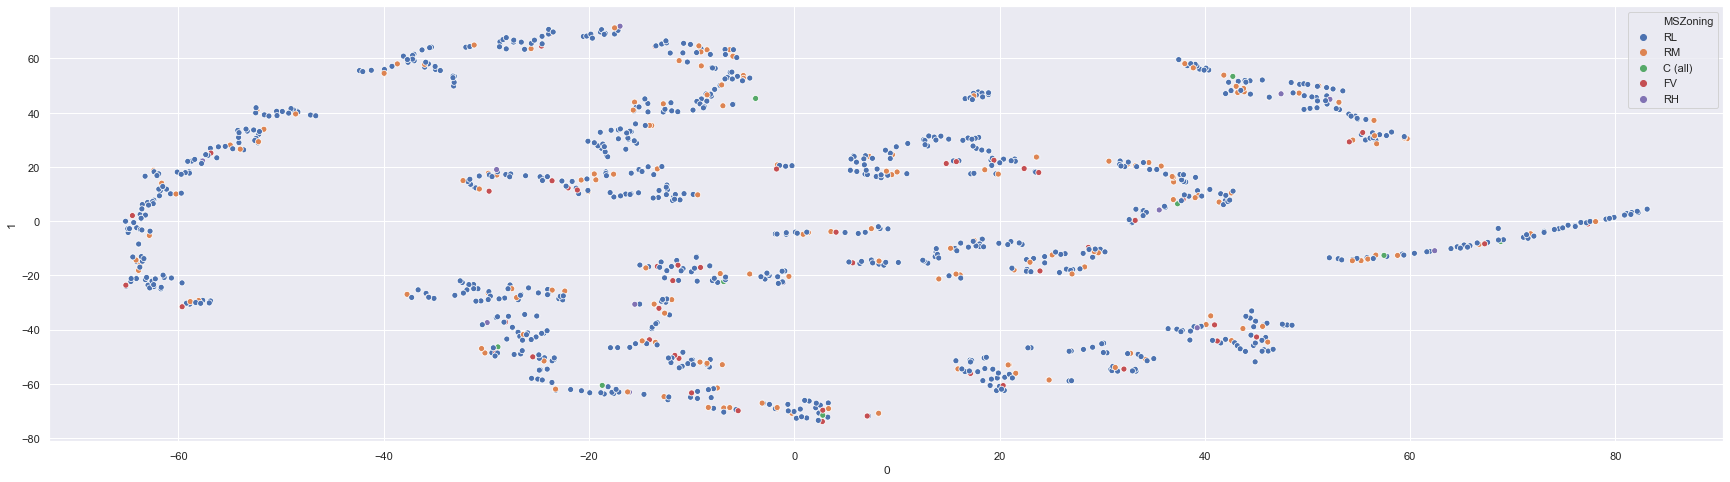

In [135]:
sns.set(rc={'figure.figsize':(30,8)})
sns.scatterplot(x=0, y=1, hue='MSZoning', data=all)

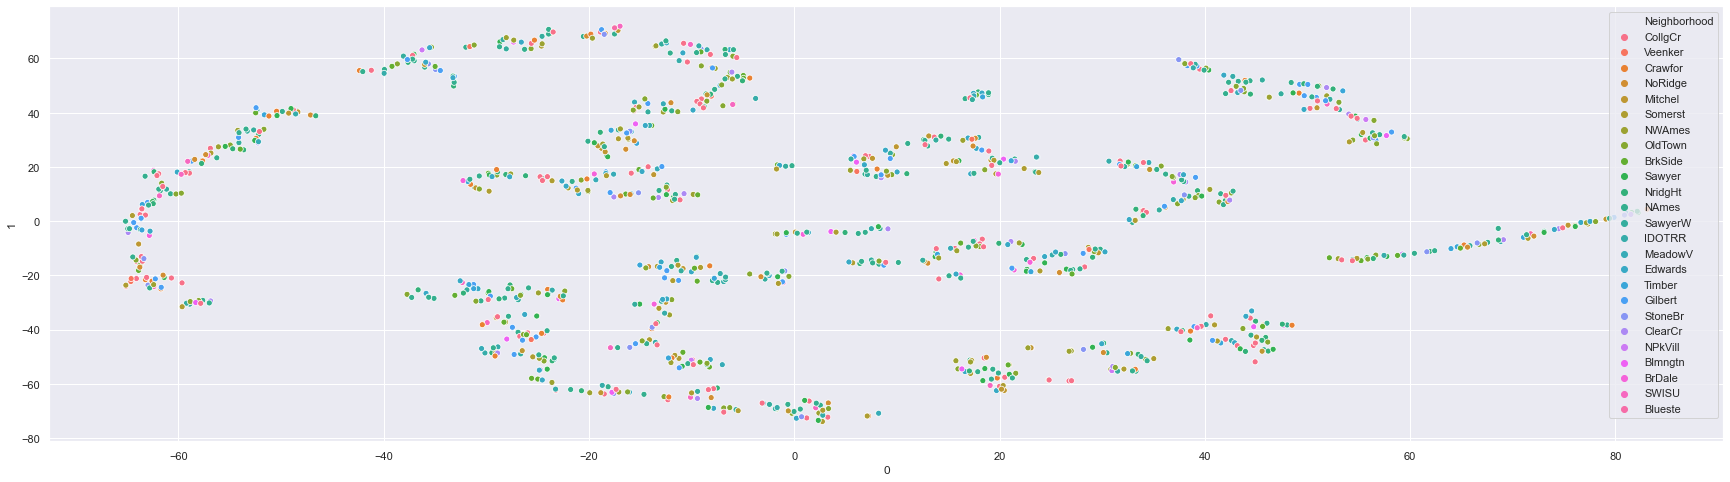

In [136]:
sns.scatterplot(x=0, y=1, hue='Neighborhood', data=all)

In [115]:
tsnex = m.fit_transform(quant)
std = StandardScaler()
s = std.fit_transform(quant)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

KMeans(n_clusters=5)

In [139]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [124]:
train

,level_0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1,1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
2,2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
3,3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,...,2.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,2.0
4,4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1456,1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,...,5.0,1.0,3.0,5.0,3.0,NaN,3.0,NaN,5.0,5.0
1457,1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,...,5.0,2.0,3.0,5.0,3.0,NaN,4.0,2.0,5.0,5.0
1458,1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,...,5.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0


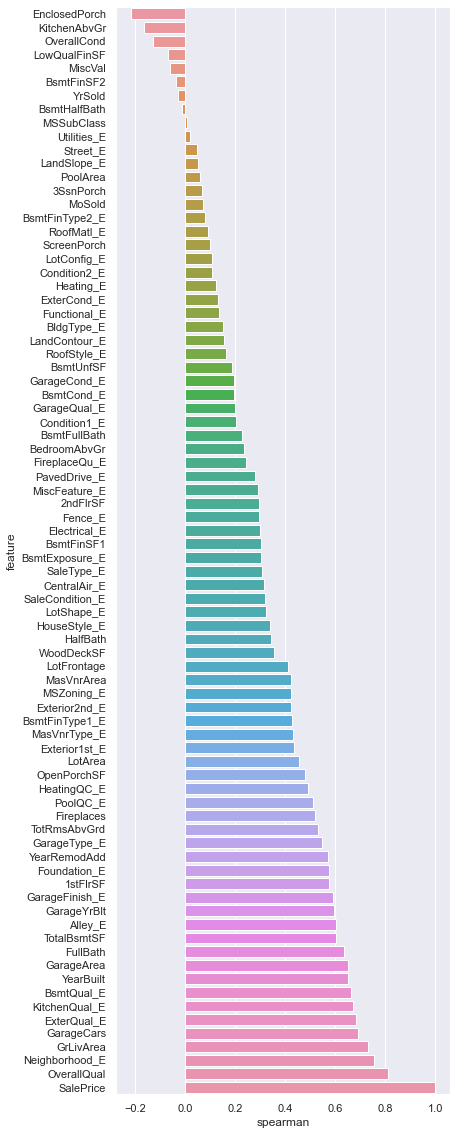

In [140]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

In [142]:
sns.set(rc={'figure.figsize':(30,8)})
features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=10)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})

print(np.sum(pca.explained_variance_ratio_))

0.7556284820752092


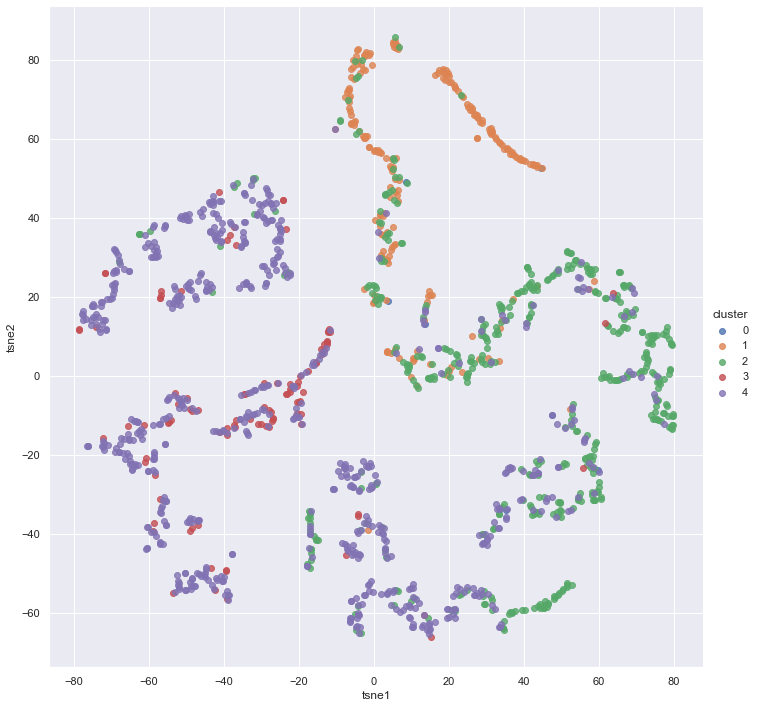

In [148]:
sns.set(rc={'figure.figsize':(100,2)})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False, height=10)

In [150]:
dumm = pd.get_dummies(train,drop_first=True)
dumm

,level_0,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,60,65.0,8450,7,5,2003,2003,...,0,0,0,0,1,0,0,0,1,0
1,1,1,2,20,80.0,9600,6,8,1976,1976,...,0,0,0,0,1,0,0,0,1,0
2,2,2,3,60,68.0,11250,7,5,2001,2002,...,0,0,0,0,1,0,0,0,1,0
3,3,3,4,70,60.0,9550,7,5,1915,1970,...,0,0,0,0,1,0,0,0,0,0
4,4,4,5,60,84.0,14260,8,5,2000,2000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1455,1456,60,62.0,7917,6,5,1999,2000,...,0,0,0,0,1,0,0,0,1,0
1456,1456,1456,1457,20,85.0,13175,6,6,1978,1988,...,0,0,0,0,1,0,0,0,1,0
1457,1457,1457,1458,70,66.0,9042,7,9,1941,2006,...,0,0,0,0,1,0,0,0,1,0
1458,1458,1458,1459,20,68.0,9717,5,6,1950,1996,...,0,0,0,0,1,0,0,0,1,0


In [169]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice', 'Id'], axis=1, inplace=True)

In [170]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


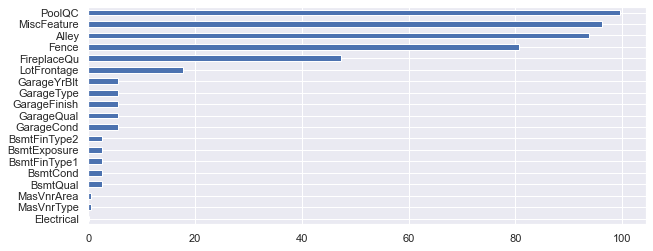

In [161]:
missing[missing > 0].sort_values().plot(kind='barh', figsize=(10,4))

In [276]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [277]:
miss = all_data.isnull().sum()
miss = miss[miss>0].sort_values(ascending=False)
miss

Series([], dtype: int64)

In [278]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


In [279]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [282]:
from scipy.stats import skew

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


In [283]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [286]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)
ntrain = train.shape[0]
ntest = test.shape[0]

(2919, 221)


In [287]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [301]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_L

In [304]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [305]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: nan (nan)



In [235]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc_dict = {}

# Create Ordinal encoder for col
ordinal_enc_dict['FireplaceQu'] = OrdinalEncoder()
col = all_data['FireplaceQu']
    
    # Select non-null values of col
col_not_null = col[col.notnull()]
reshaped_vals = col_not_null.values.reshape(-1, 1)
encoded_vals = ordinal_enc_dict['FireplaceQu'].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
all_data.loc[all_data.FireplaceQu.notnull(), 'FireplaceQu'] = np.squeeze(encoded_vals)

In [248]:
all_data['FireplaceQu'].unique()
np.any(np.isnan(all_data['FireplaceQu']))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [247]:
from fancyimpute import KNN
KNN_imputer = KNN()
X_filled_knn = KNN(k=3).fit_transform([all_data['FireplaceQu']])
reshaped = all_data['FireplaceQu'].values.reshape(-1, 1)
all_data['FireplaceQu'] = ordinal_enc_dict['FireplaceQu'].inverse_transform(reshaped)

Imputing row 1/1 with 1420 missing, elapsed time: 0.001
[KNN] Warning: 1420/2919 still missing after imputation, replacing with 0


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [233]:
encoded_vals

array([[4.],
       [4.],
       [2.],
       ...,
       [4.],
       [4.],
       [4.]])

In [221]:
miss = miss.index.to_list()
all_data[miss]

,FireplaceQu,LotFrontage,GarageCond,GarageFinish,GarageYrBlt,GarageQual,GarageType,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrType,MasVnrArea,MSZoning,BsmtFullBath,BsmtHalfBath,Utilities,Functional
0,NaN,65.0,TA,RFn,2003.0,TA,Attchd,No,TA,Gd,Unf,GLQ,BrkFace,196.0,RL,1.0,0.0,AllPub,Typ
1,TA,80.0,TA,RFn,1976.0,TA,Attchd,Gd,TA,Gd,Unf,ALQ,None,0.0,RL,0.0,1.0,AllPub,Typ
2,TA,68.0,TA,RFn,2001.0,TA,Attchd,Mn,TA,Gd,Unf,GLQ,BrkFace,162.0,RL,1.0,0.0,AllPub,Typ
3,Gd,60.0,TA,Unf,1998.0,TA,Detchd,No,Gd,TA,Unf,ALQ,None,0.0,RL,1.0,0.0,AllPub,Typ
4,TA,84.0,TA,RFn,2000.0,TA,Attchd,Av,TA,Gd,Unf,GLQ,BrkFace,350.0,RL,1.0,0.0,AllPub,Typ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,NaN,21.0,NaN,NaN,NaN,NaN,NaN,No,TA,TA,Unf,Unf,None,0.0,RM,0.0,0.0,AllPub,Typ
2915,NaN,21.0,TA,Unf,1970.0,TA,CarPort,No,TA,TA,Unf,Rec,None,0.0,RM,0.0,0.0,AllPub,Typ
2916,TA,160.0,TA,Unf,1960.0,TA,Detchd,No,TA,TA,Unf,ALQ,None,0.0,RL,1.0,0.0,AllPub,Typ
2917,NaN,62.0,NaN,NaN,NaN,NaN,NaN,Av,TA,Gd,Unf,GLQ,None,0.0,RL,0.0,1.0,AllPub,Typ


In [126]:
train[qual_encoded]

,MSZoning_E,Street_E,Alley_E,LotShape_E,LandContour_E,Utilities_E,LotConfig_E,LandSlope_E,Neighborhood_E,Condition1_E,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,4.0,2.0,NaN,1.0,2.0,2.0,1.0,1.0,17.0,5.0,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1,4.0,2.0,NaN,1.0,2.0,2.0,2.0,1.0,21.0,3.0,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
2,4.0,2.0,NaN,2.0,2.0,2.0,1.0,1.0,17.0,5.0,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
3,4.0,2.0,NaN,2.0,2.0,2.0,3.0,1.0,18.0,5.0,...,2.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,2.0
4,4.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,25.0,5.0,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.0,2.0,NaN,1.0,2.0,2.0,1.0,1.0,15.0,5.0,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1456,4.0,2.0,NaN,1.0,2.0,2.0,1.0,1.0,14.0,5.0,...,5.0,1.0,3.0,5.0,3.0,NaN,3.0,NaN,5.0,5.0
1457,4.0,2.0,NaN,1.0,2.0,2.0,1.0,1.0,18.0,5.0,...,5.0,2.0,3.0,5.0,3.0,NaN,4.0,2.0,5.0,5.0
1458,4.0,2.0,NaN,1.0,2.0,2.0,1.0,1.0,11.0,5.0,...,5.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0


In [ ]:
ost = quantitative2.loc[quantitative2['LotArea']<38000]
ax = sns.kdeplot(quant['LotArea'],quant['SalePrice'], shade=True, n_levels=5,figsize=(12,10))

In [ ]:
quant.columns[0:-1]

In [ ]:
for i,j in quant.iterrows():
    print(i[0])

In [ ]:
quantitative2['LotArea'].quantile(0.99)

In [ ]:
quantitative2.loc[quantitative2['LotArea']<38000]

In [ ]:
from scipy import stats
est = quantitative2[(np.abs(stats.zscore(quantitative2)) < 3).all(axis=1)]

In [ ]:
est

In [ ]:
est = quantitative2[quantitative2.apply(lambda x :(x-x.mean()).abs()<(2*x.std()) ).all(1)]

In [ ]:
est.info()